In [29]:
from pyphysim.modulators.ofdm import *
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook

In [14]:
fft_size = 16
cp_size = 4
num_used_subcarriers=14

In [15]:
ofdm_obj = OFDM(fft_size,cp_size,num_used_subcarriers)

+ set_parameters(self, fft_size, cp_size, num_used_subcarriers=None)
+ _calc_zeropad(self, input_data_size)
+ _get_subcarrier_numbers(self):

In [16]:
ofdm_obj._get_subcarrier_numbers()

array([ 0,  1,  2,  3,  4,  5,  6,  7, -8, -7, -6, -5, -4, -3, -2, -1])

In [17]:
ofdm_obj._get_used_subcarrier_numbers()

array([ 1,  2,  3,  4,  5,  6,  7, -7, -6, -5, -4, -3, -2, -1])

In [24]:
num_bits = 2500
ip_bits = np.random.random_integers(0, 1, num_bits)
num_mod_symbols = num_bits * 1
ip_mod = 2 * ip_bits - 1

In [ ]:
plt.st

In [44]:
imin = 0 
imax = 600
plt.step(np.arange(imin,imax),ip_mod[imin:imax])

In [45]:
 ofdm_symbols = ofdm_obj.modulate(ip_mod)

In [47]:
W

array([-10000000.,  -8750000.,  -7500000.,  -6250000.,  -5000000.,
        -3750000.,  -2500000.,  -1250000.,         0.,   1250000.,
         2500000.,   3750000.,   5000000.,   6250000.,   7500000.,
         8750000.])

<IPython.core.display.Javascript object>


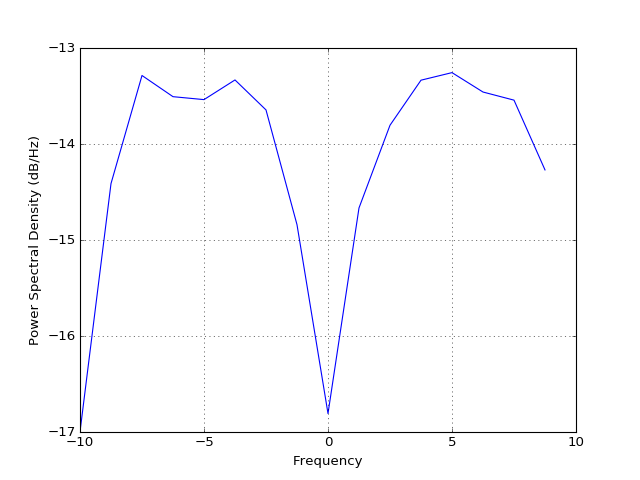

<IPython.core.display.Javascript object>


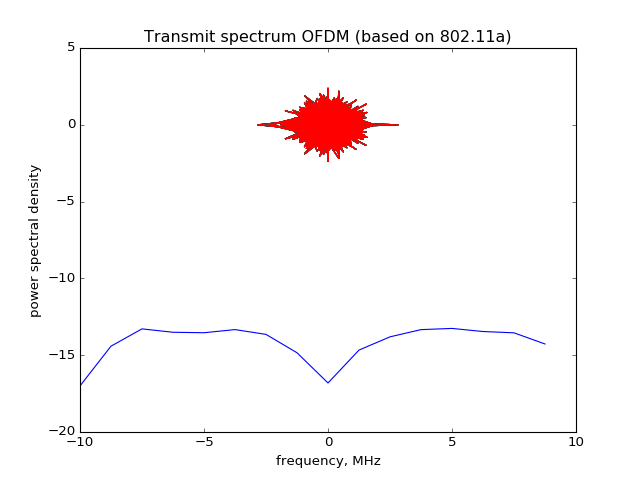

In [48]:
import pylab
fsMHz = 20
Pxx, W = pylab.psd(ofdm_symbols, NFFT=ofdm_obj.fft_size, Fs=fsMHz)
    # [Pxx,W] = pwelch(st,[],[],4096,20);
plt.figure()
plt.plot(
        W,
        # 10 * np.log10(np.fft.fftshift(Pxx))
        10 * np.log10(Pxx)
    )
plt.xlabel('frequency, MHz')
plt.ylabel('power spectral density')
plt.title('Transmit spectrum OFDM (based on 802.11a)')
plt.show()


<IPython.core.display.Javascript object>


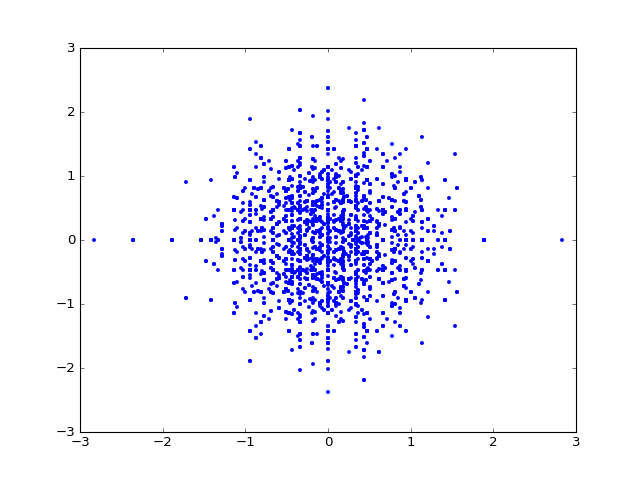

In [135]:
plt.figure()
plt.plot(np.real(ofdm_symbols),np.imag(ofdm_symbols),'.')

In [77]:
import numpy as np
from matplotlib import pyplot as plt
from pyphysim.modulators import QPSK, OFDM
from pyphysim.modulators.ofdm import OfdmOneTapEqualizer
from pyphysim.channels.singleuser import SuChannel
from pyphysim.channels.fading_generators import JakesSampleGenerator
from pyphysim.channels.fading import COST259_TUx

## Simulation parameters

### OFDM parameters

In [69]:
num_symbols = 10000
fft_size = 512
num_used_subcarriers = 300
cp_size = 52

### Jakes sample generator parameters

In [137]:
Fd = 5
Ts = 1e-7
L = 20

### Channel Profile

In [138]:
channel_profile = COST259_TUx.get_discretize_profile(Ts)

<IPython.core.display.Javascript object>


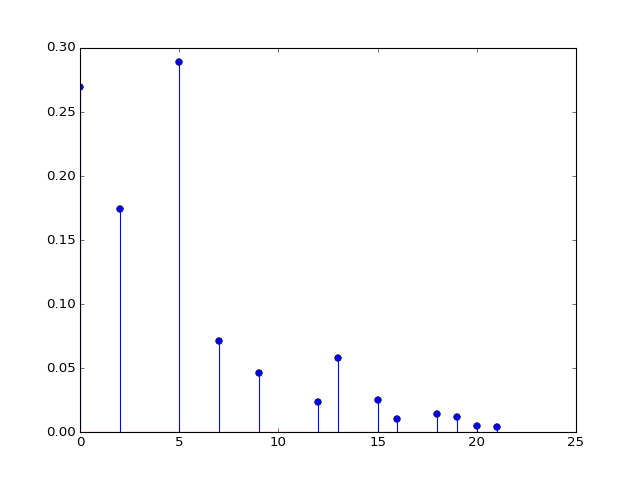

<Container object of 3 artists>

In [139]:
tk = channel_profile.tap_delays
ak = channel_profile.tap_powers_linear
plt.figure()
plt.stem(tk,ak)

## Input signal generation 

In [140]:
input_data = np.random.random_integers(0, 4 - 1, num_symbols)

<IPython.core.display.Javascript object>


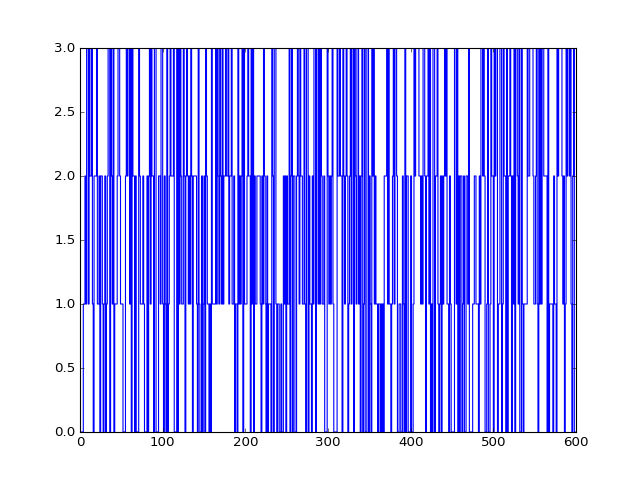

In [113]:
plt.figure()
plt.step(np.arange(imin,imax),input_data[imin:imax])

### QPSK and OFDM Modulators

In [115]:
qpsk_obj = QPSK()
ofdm_obj = OFDM(fft_size=fft_size, cp_size=cp_size,num_used_subcarriers=num_used_subcarriers)
modulated_data = qpsk_obj.modulate(input_data)
transmit_data = ofdm_obj.modulate(modulated_data)

<IPython.core.display.Javascript object>


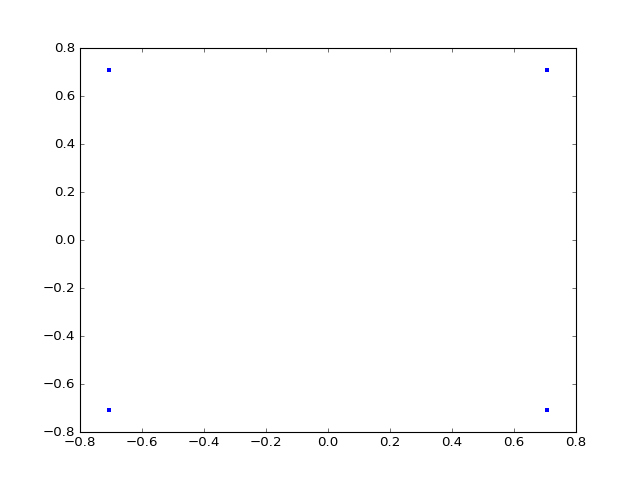

In [117]:
plt.figure()
plt.plot(np.real(modulated_data),np.imag(modulated_data),'.')

## Transmit data through the channel

In [141]:
jakes = JakesSampleGenerator(Fd, Ts, L)
channel = SuChannel(jakes, channel_profile)
channel_memory = channel.num_taps_with_padding - 1
received_data = channel.corrupt_data(transmit_data)

<IPython.core.display.Javascript object>


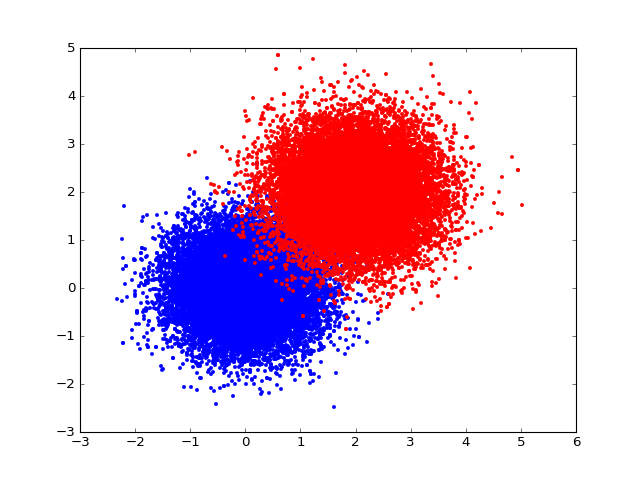

In [144]:
plt.figure()
plt.plot(np.real(transmit_data),np.imag(transmit_data),'.')
plt.plot(np.real(received_data),np.imag(received_data),'.r')

In [145]:
## Demodulate data

In [146]:
ofdm_received_data = ofdm_obj.demodulate(received_data[:-channel_memory])

<IPython.core.display.Javascript object>


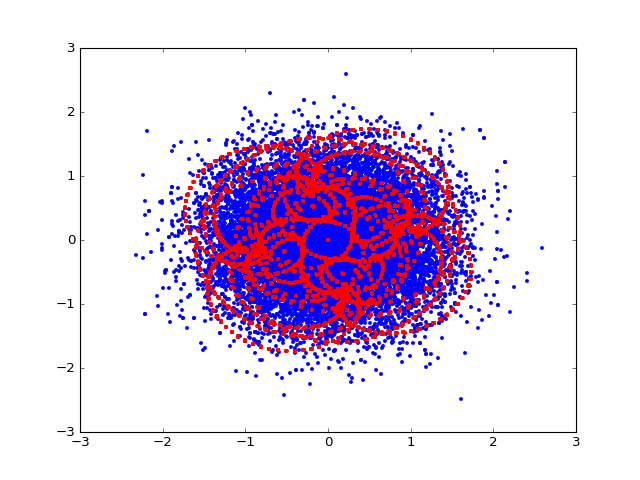

In [149]:
plt.figure()
plt.plot(np.real(transmit_data),np.imag(transmit_data),'.')
plt.plot(np.real(ofdm_received_data),np.imag(ofdm_received_data),'.r')

## One-Tap Equalization

In [151]:
impulse_response = channel.get_last_impulse_response()
freq_response = impulse_response.get_freq_response(fft_size)

## Equalization 


In [170]:
equalizer = OfdmOneTapEqualizer(ofdm_obj)
equalized_ofdm_received_data = equalizer.equalize_data(ofdm_received_data,
                                                       impulse_response)
equalized_ofdm_received_data = equalized_ofdm_received_data[:num_symbols]

<IPython.core.display.Javascript object>


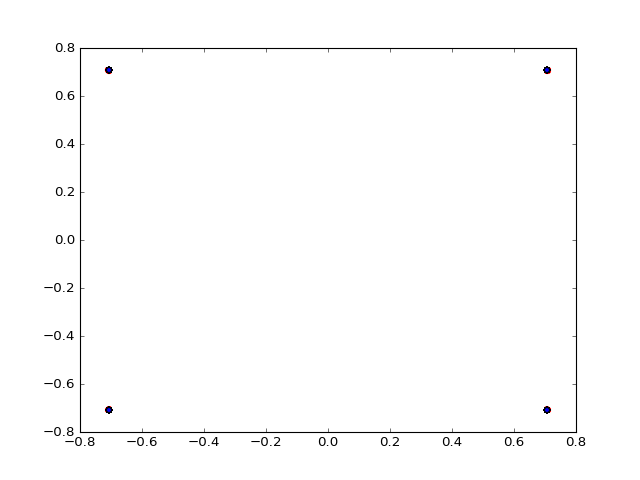

In [171]:
plt.figure()
plt.scatter(equalized_ofdm_received_data.real,
            equalized_ofdm_received_data.imag,
            color='r')
plt.scatter(modulated_data.real, modulated_data.imag)

In [172]:
equalized_ofdm_received_data

array([ 0.70689173-0.70707557j,  0.70689571+0.70697348j,
        0.70705429+0.70695881j, ..., -0.70718468-0.70720075j,
       -0.70698186-0.70701994j,  0.70716387+0.70721932j])

In [174]:
modulated_data

array([ 0.70710678-0.70710678j,  0.70710678+0.70710678j,
        0.70710678+0.70710678j, ..., -0.70710678-0.70710678j,
       -0.70710678-0.70710678j,  0.70710678+0.70710678j])

In [160]:
demodulated_data = qpsk_obj.demodulate(equalized_ofdm_received_data)

In [175]:
input_data

array([0, 2, 2, ..., 2, 3, 2])

In [176]:
demodulated_data

array([2, 0, 0, ..., 3, 3, 0])

In [169]:
input_data

array([0, 2, 2, ..., 2, 3, 2])

<IPython.core.display.Javascript object>


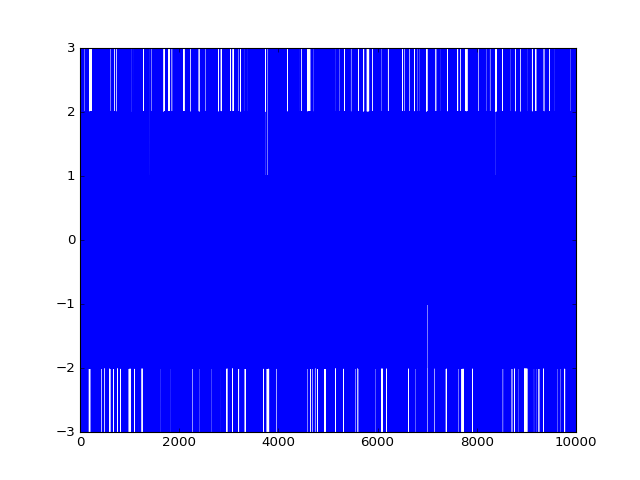

In [168]:
plt.figure()
plt.plot(demodulated_data-input_data)
